# Przewidywanie chorób serca na podstawie innych czynników zdrowotnych

Zadaniem projektu jest porównanie popularnych modeli klasyfikacji nauczonych na zbiorze: ***Personal Key Indicators of Heart Disease*** autorstwa Kamila Pytlaka https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [4]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Ładowanie danych

In [5]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Opis danych

* ***HeartDisease*** - Badani, którzy oświadczyli, że mieli/mają chorobę wieńcową serca lub zawał mięśnia sercowego
* ***BMI*** - Body Mass Index
* ***Smoking*** - Badani, którzy wypalili co najmniej 100 papierosów w życiu
* ***AlcoholDrinking*** - Ludzie nadużywający alkoholu (mężczyźni, którzy piją co najmniej 14 drinków tygodniowo, kobiety - co najmniej 7 drinków tygodniowo)
* ***Stroke*** - Badani, którzy mieli udar
* ***PhysicalHealth*** - Przez ile dni w ciągu ostatnich 30 dni badany nie czuł się dobrze fizycznie
* ***MentalHealth*** - Przez ile dni w ciągu ostatnich 30 dni badany nie czuł się dobrze psychicznie
* ***DiffWalking*** - Czy badany ma trudności w chodzeniu lub we wchodzeniu po schodach
* ***Sex*** - Płeć badanego
* ***AgeCategory*** - Czternastostopniowa kategoria wiekowa badanego
* ***Race*** - Podana przez badanego rasa/pochodzenie etniczne
* ***Diabetic*** - Czy badany ma/miał cukrzycę?
* ***PhysicalActivity*** - Badani, którzy zadeklarowali uprawianie ćwiczeń fizycznych różnych od ich pracy w ciągu ostatnich 30 dni
* ***GenHealth*** - Poziom zdrowia zadeklarowany przez badanego
* ***SleepTime*** - Średnia długość snu badanego
* ***Asthma*** - Czy badany ma/miał astmę?
* ***KidneyDisease*** - Z wyłączeniem kamieni nerkowych, zapalenia pęcherza, niemożności trzymania moczu, czy badany ma/miał jakiekolwiek problemy z nerkami?
* ***SkinCancer*** - Czy badany ma/miał raka skóry?

Mamy zatem następujące dane kategoryczne: ***HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer, AgeCategory***

oraz ciągłe: ***BMI, PhysicalHealth, MentalHealth, SleepTime***

## Przetwarzanie danych

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Sprawdźmy, czy wszystkie komórki danych są wypełnione:

In [7]:
df.isnull().values.any()

False

### Przyjrzyjmy się rozkładowi danych w kolumnach kategorycznych i przetwórzmy je na dane numeryczne

***HeartDisease***:

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


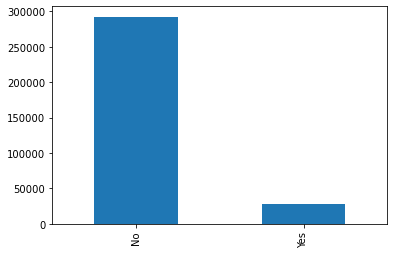

In [8]:
print(df['HeartDisease'].value_counts())
df['HeartDisease'].value_counts().plot(kind='bar')
plt.show()

df['HeartDisease'] = df['HeartDisease'].replace({ 'Yes': 1, 'No': 0})

***Smoking:***

No     187887
Yes    131908
Name: Smoking, dtype: int64


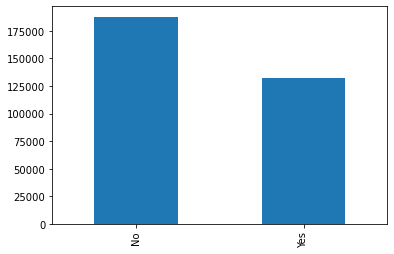

In [9]:
print(df['Smoking'].value_counts())
df['Smoking'].value_counts().plot(kind='bar')
plt.show()

df['Smoking'] = df['Smoking'].replace({ 'Yes': 1, 'No': 0})

***AlcoholDrinking:***

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


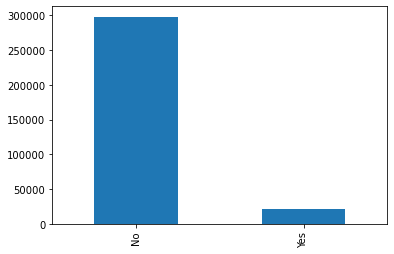

In [10]:
print(df['AlcoholDrinking'].value_counts())
df['AlcoholDrinking'].value_counts().plot(kind='bar')
plt.show()

df['AlcoholDrinking'] = df['AlcoholDrinking'].replace({ 'Yes': 1, 'No': 0})

***Stroke:***

No     307726
Yes     12069
Name: Stroke, dtype: int64


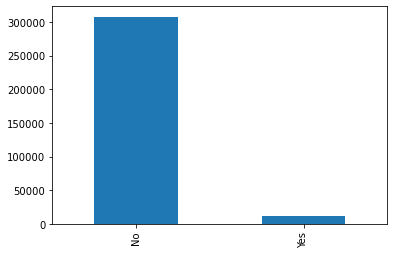

In [11]:
print(df['Stroke'].value_counts())
df['Stroke'].value_counts().plot(kind='bar')
plt.show()

df['Stroke'] = df['Stroke'].replace({ 'Yes': 1, 'No': 0})

***DiffWalking:***

No     275385
Yes     44410
Name: DiffWalking, dtype: int64


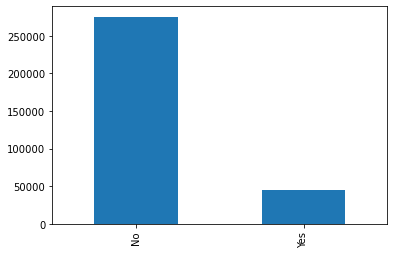

In [12]:
print(df['DiffWalking'].value_counts())
df['DiffWalking'].value_counts().plot(kind='bar')
plt.show()

df['DiffWalking'] = df['DiffWalking'].replace({ 'Yes': 1, 'No': 0})

***Sex:***

Female    167805
Male      151990
Name: Sex, dtype: int64


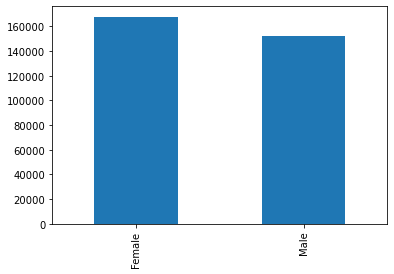

In [13]:
print(df['Sex'].value_counts())
df['Sex'].value_counts().plot(kind='bar')
plt.show()

df['Sex'] = df['Sex'].replace({ 'Male': 1, 'Female': 0})

***Race:***

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


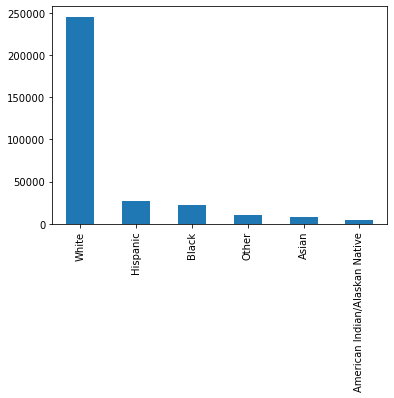

In [14]:
print(df['Race'].value_counts())
df['Race'].value_counts().plot(kind='bar')
plt.show()

df = pd.get_dummies(df, columns=['Race'], prefix=['Race'])

***Diabetic:***

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


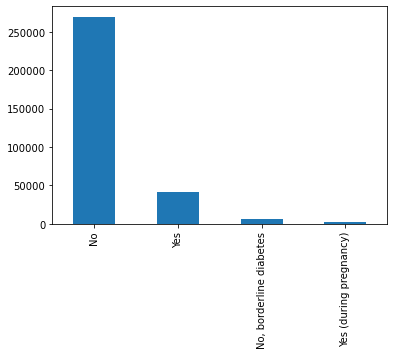

In [15]:
print(df['Diabetic'].value_counts())
df['Diabetic'].value_counts().plot(kind='bar')
plt.show()

df = pd.get_dummies(df, columns=['Diabetic'], prefix=['Diabetic'])

***PhysicalActivity:***

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


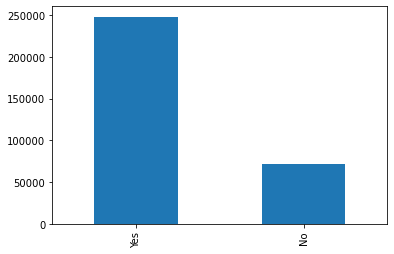

In [16]:
print(df['PhysicalActivity'].value_counts())
df['PhysicalActivity'].value_counts().plot(kind='bar')
plt.show()

df['PhysicalActivity'] = df['PhysicalActivity'].replace({ 'Yes': 1, 'No': 0})

***GenHealth:***

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


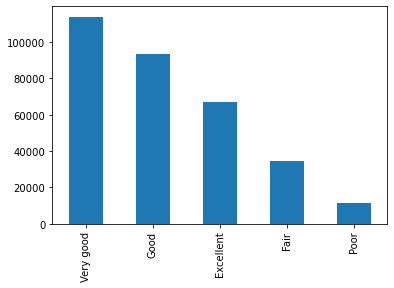

In [17]:
print(df['GenHealth'].value_counts())
df['GenHealth'].value_counts().plot(kind='bar')
plt.show()

df = pd.get_dummies(df, columns=['GenHealth'], prefix=['GenHealth'])

***Asthma:***

No     276923
Yes     42872
Name: Asthma, dtype: int64


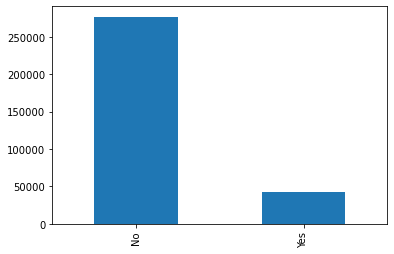

In [18]:
print(df['Asthma'].value_counts())
df['Asthma'].value_counts().plot(kind='bar')
plt.show()

df['Asthma'] = df['Asthma'].replace({ 'Yes': 1, 'No': 0})

***KidneyDisease:***

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


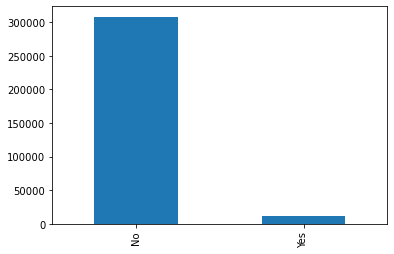

In [19]:
print(df['KidneyDisease'].value_counts())
df['KidneyDisease'].value_counts().plot(kind='bar')
plt.show()

df['KidneyDisease'] = df['KidneyDisease'].replace({ 'Yes': 1, 'No': 0})

***SkinCancer:***

No     289976
Yes     29819
Name: SkinCancer, dtype: int64


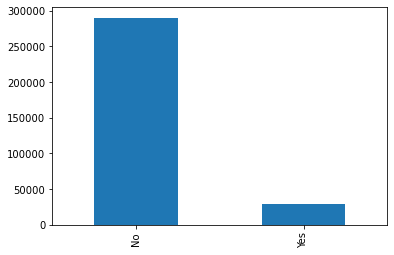

In [20]:
print(df['SkinCancer'].value_counts())
df['SkinCancer'].value_counts().plot(kind='bar')
plt.show()

df['SkinCancer'] = df['SkinCancer'].replace({ 'Yes': 1, 'No': 0})

***AgeCategory*** nie powinna być daną kategoryczną, więc zamieńmy każdą z kategorii na średni wiek tej kategorii:

In [21]:
ageCategory_dict = {'55-59': 57, '80 or older': 80, '65-69': 67,
                      '75-79': 77,'40-44': 42,'70-74': 72,'60-64': 62,
                      '50-54': 52,'45-49': 47,'18-24': 21,'35-39': 37,
                      '30-34': 32,'25-29': 27}

df['AgeCategory'] = df['AgeCategory'].apply(lambda val: ageCategory_dict[val])
df['AgeCategory'] = df['AgeCategory'].astype('float')

Wszystkie powyższe kolumny wydają się być na podstawie opisów odpowiednie do nauki klasyfikatorów. Należy jednak zwrócić uwagę, że dane są niezbalansowane. Poradzimy sobie z tym używając metody oversamplingu.

### Rozkład danych ciągłych:

Text(0.5, 1.0, 'Distribution of BMI Among People')

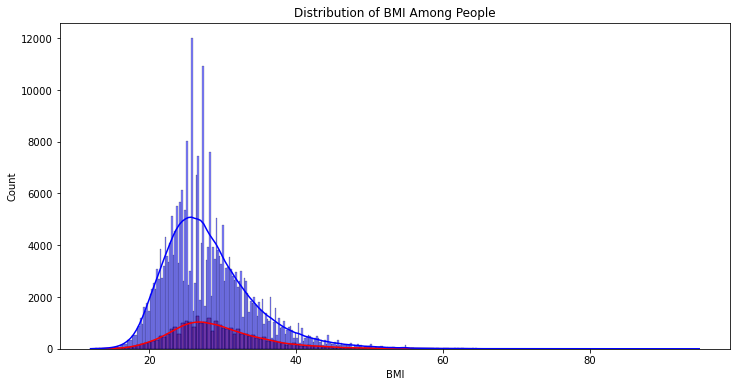

In [22]:
plt.figure(figsize=(12,6))

sns.histplot(data=df[df['HeartDisease']==1],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']==0],x='BMI',kde=True,color='blue')
plt.title('Distribution of BMI Among People')

/Users/mbas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Heart Disease amoung different MentalHealth')

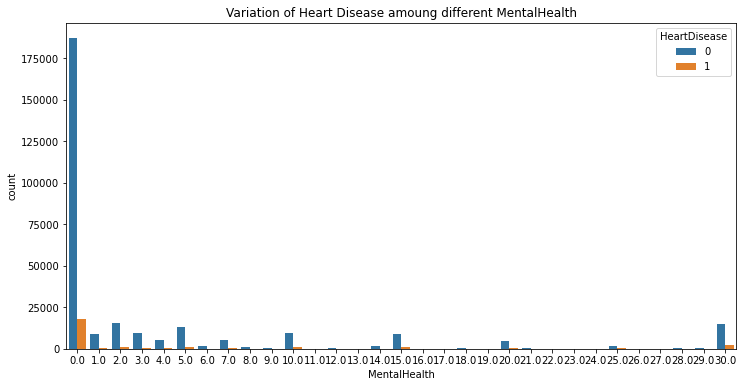

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(df['MentalHealth'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease amoung different MentalHealth')

/Users/mbas/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Heart Disease amoung different PhysicalHealth')

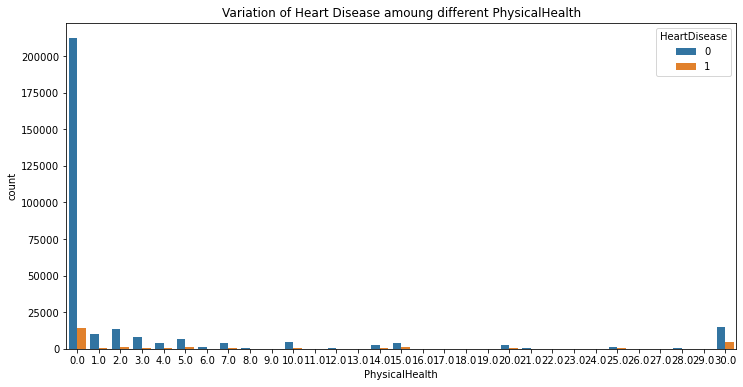

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df['PhysicalHealth'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease amoung different PhysicalHealth')

## Wykres korelacji zmiennych

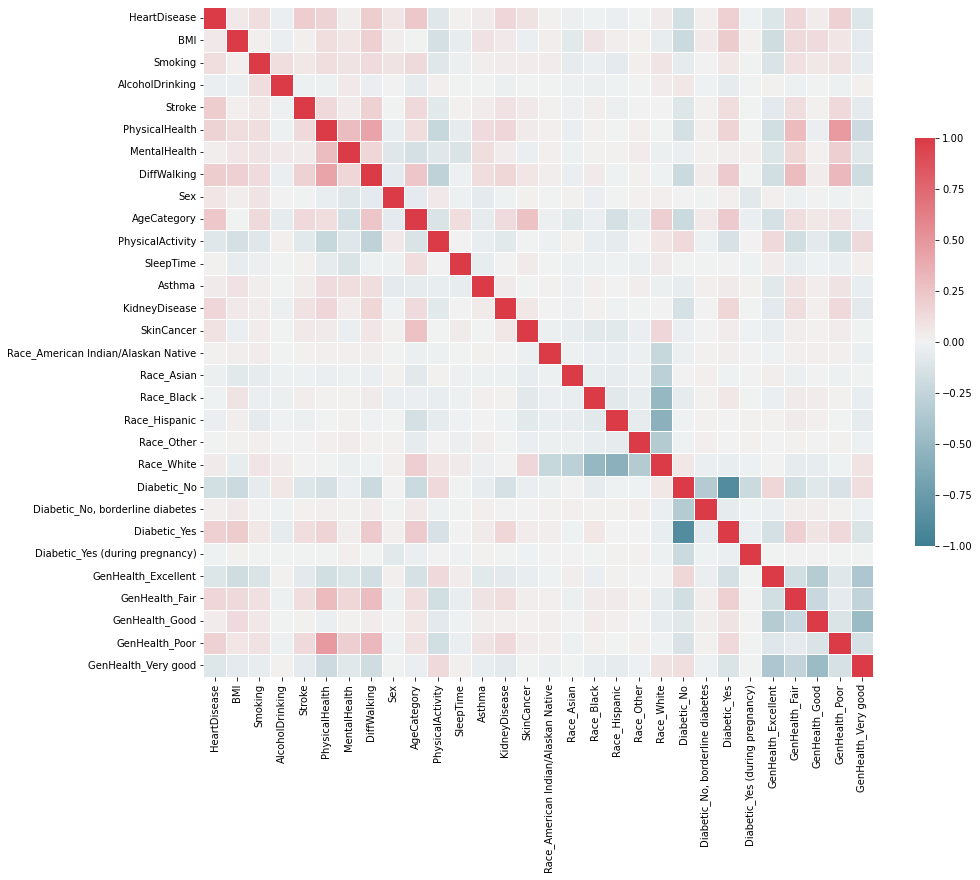

In [25]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={'shrink': .5}, ax=ax)
plt.show()

Na podstawie wykresu korelacji można zaobserwować zgodnie z przewidywaniami, że
* Poziom zdrowia generalnego, jest powiązany z trudnościami w chodzeniu, zdrowiem fizycznym oraz psychicznym, oraz z BMI
* Cykrzyca jest powiązana z BMI
* Rasy są ujemnie skolerowane wzajemnie

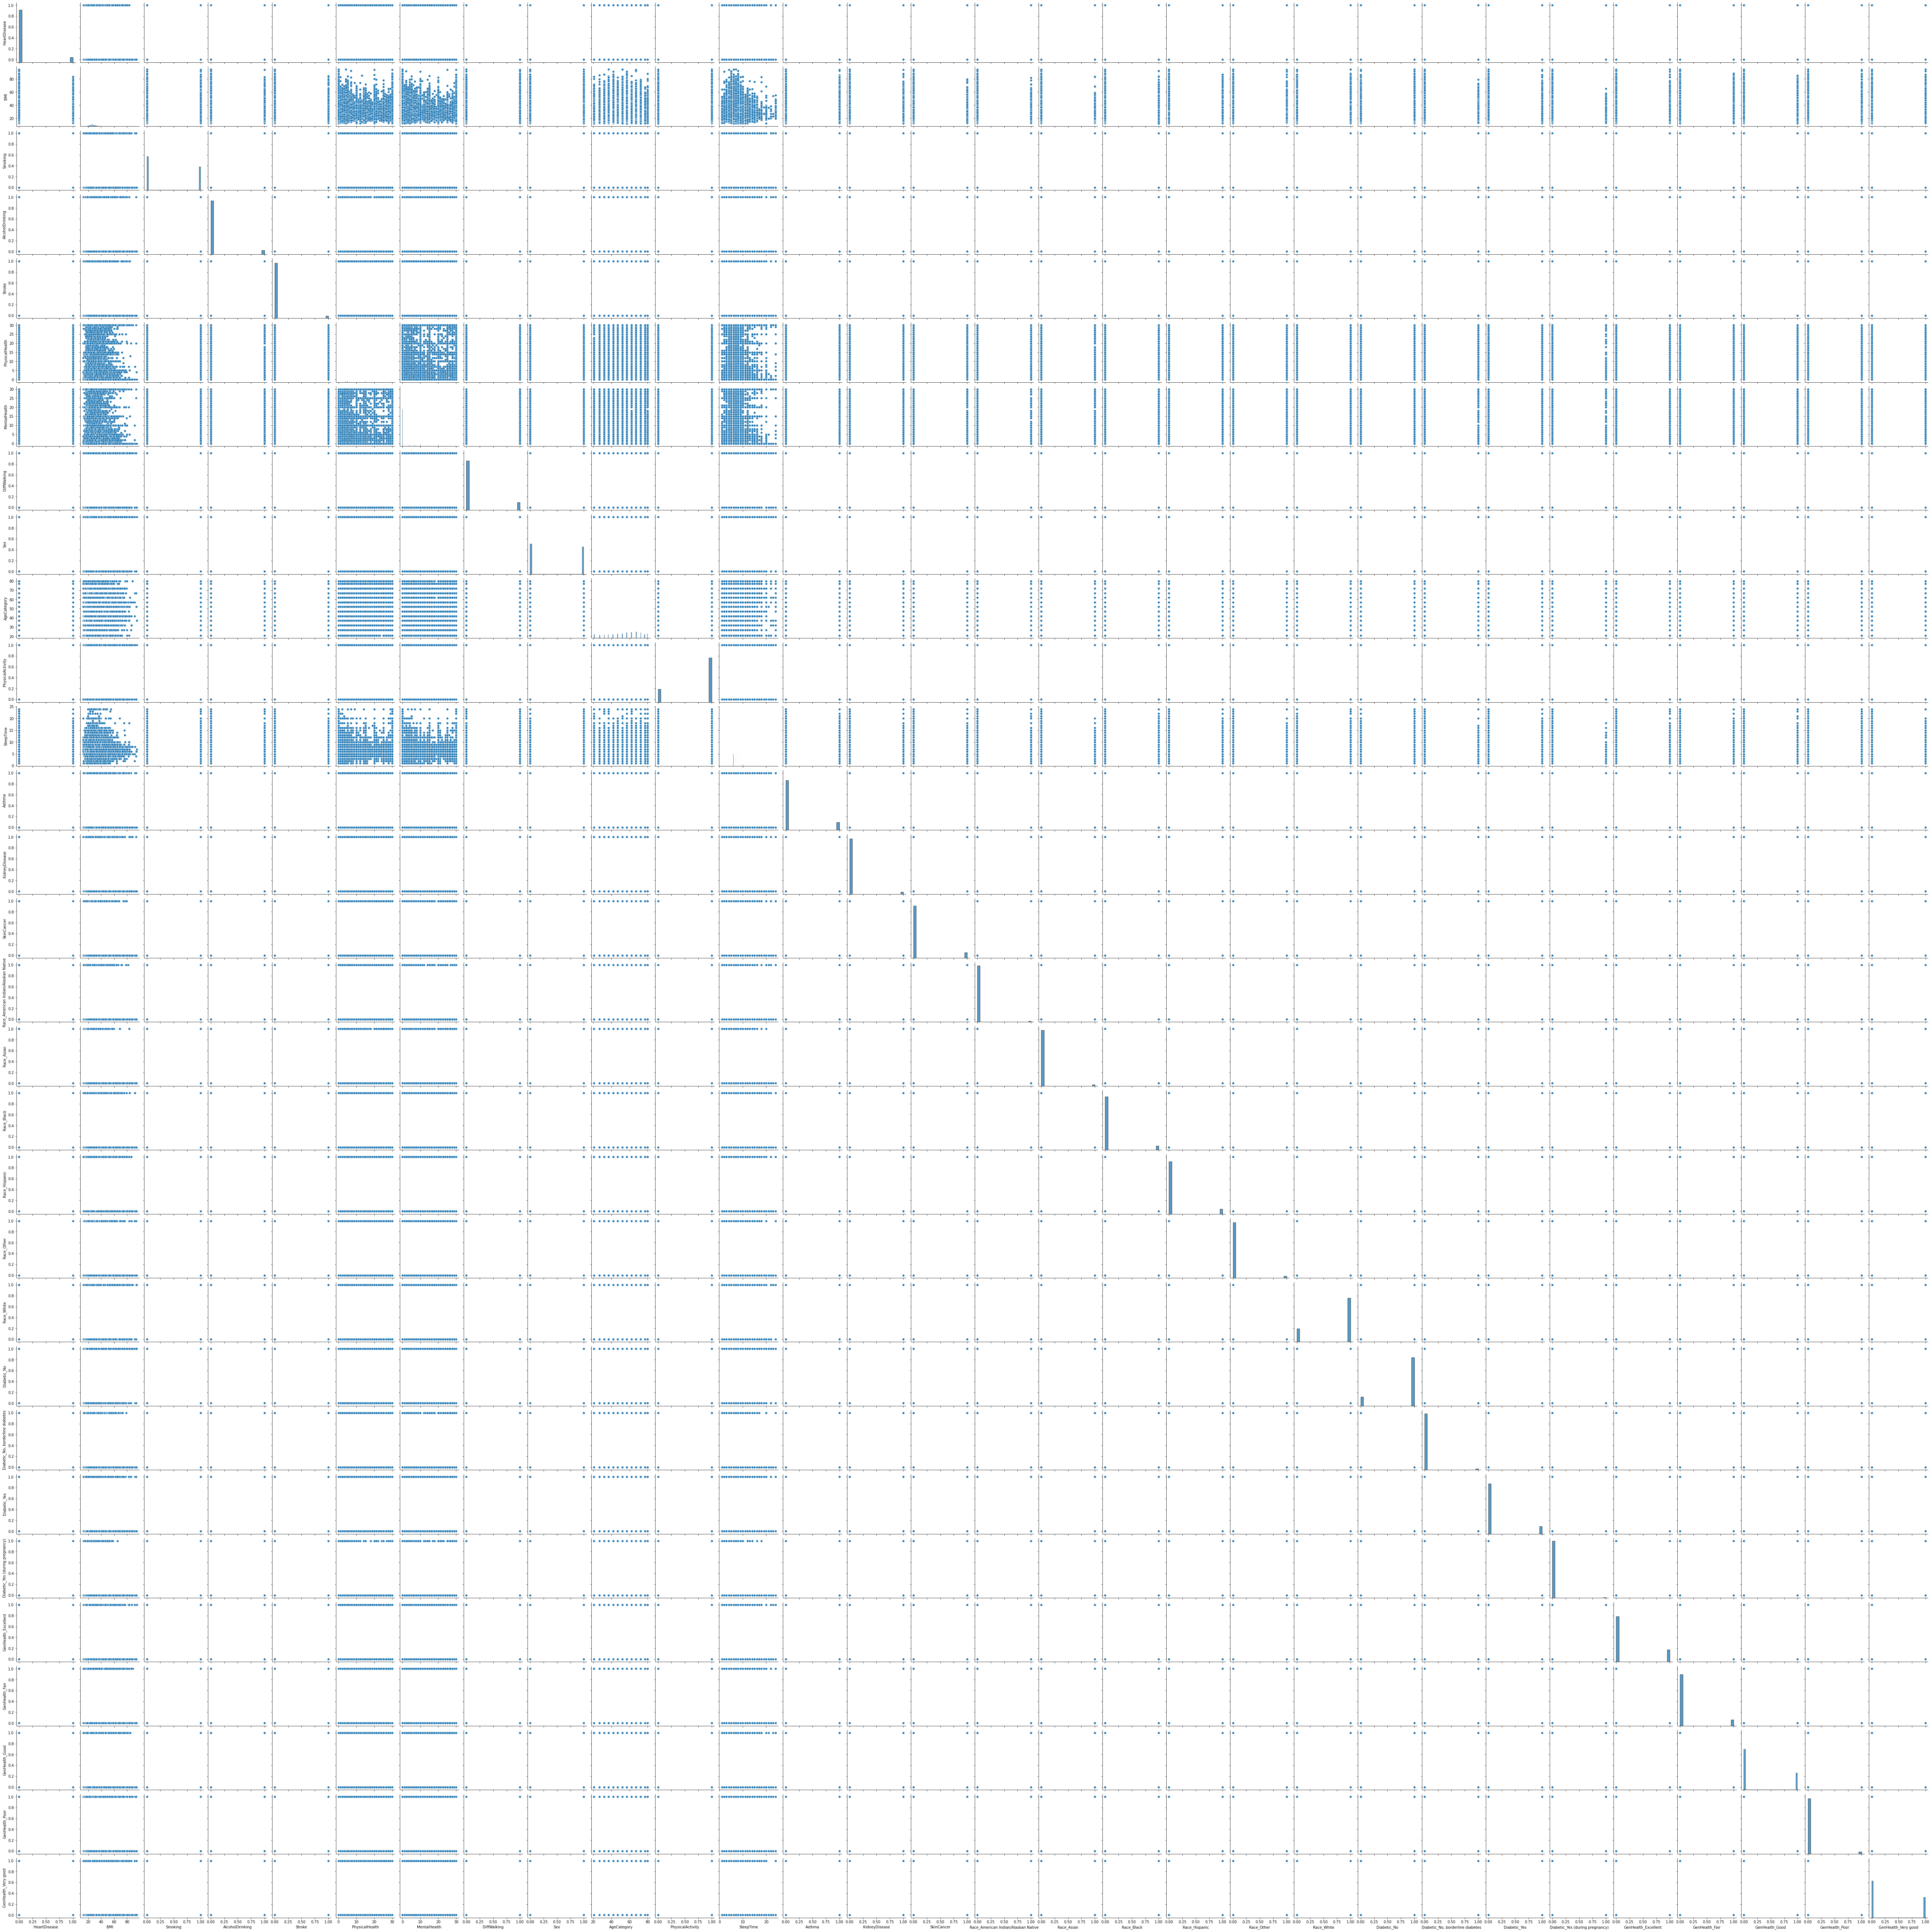

In [26]:
import seaborn as sns

sns.pairplot(df)
plt.show()

## Przygotowanie zbioru treningowego i walidacyjnego

Używając metody undersamplingu balansujemy zbiór danych i następnie dzielimy zbiór danych w następujący sposób: 80% dane treningowe, 20% dane testowe

In [27]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy="majority")
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_under, y_under = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, shuffle=True, test_size=0.2)

# Modele treningowe

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

kfold = model_selection.KFold(n_splits=5, random_state=None)

import warnings
warnings.filterwarnings('ignore')

## Regresja logistyczna

In [25]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

lr = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

lr.fit(X_train, y_train)
print(lr.best_params_)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test,y_pred_lr))

{'classifier__C': 1, 'preprocessing': StandardScaler()}
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      5457
           1       0.75      0.79      0.77      5493

    accuracy                           0.76     10950
   macro avg       0.77      0.76      0.76     10950
weighted avg       0.77      0.76      0.76     10950



## RandomForestClassifier

In [26]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [8, 16, 32, 64],
            'classifier__max_leaf_nodes': [10, 20, 30, 40, 50],
}

rf = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

rf.fit(X_train, y_train)
print(rf.best_params_)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test,y_pred_rf))

{'classifier__max_leaf_nodes': 50, 'classifier__n_estimators': 64, 'preprocessing': None}
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      5457
           1       0.74      0.82      0.78      5493

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



## K Nearest Neighbors

In [27]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_neighbors': [1, 2, 4],
            'classifier__p': [1, 2, 4],
}

knn = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

knn.fit(X_train, y_train)
print(knn.best_params_)

y_pred_knn = knn.predict(X_test)

print(classification_report(y_test,y_pred_knn))

{'classifier__n_neighbors': 4, 'classifier__p': 2, 'preprocessing': StandardScaler()}
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      5457
           1       0.75      0.62      0.68      5493

    accuracy                           0.70     10950
   macro avg       0.71      0.70      0.70     10950
weighted avg       0.71      0.70      0.70     10950



## BaggingClassifier

In [34]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [2, 4, 8, 16, 32],
            'classifier__max_samples': [0.1, 0.2, 0.4, 0.8, 1],
}

svm_bg = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svm_bg.fit(X_train, y_train)

print(svm_bg.best_params_)

y_pred_svm_bg = svm_bg.predict(X_test)

print(classification_report(y_test,y_pred_svm_bg))

{'classifier__max_samples': 0.1, 'classifier__n_estimators': 32, 'preprocessing': StandardScaler()}
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      5457
           1       0.75      0.78      0.76      5493

    accuracy                           0.76     10950
   macro avg       0.76      0.75      0.75     10950
weighted avg       0.76      0.76      0.75     10950



## SVM LINEAR

In [29]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1],
}

svm_l = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svm_l.fit(X_train, y_train)

print(svm_l.best_params_)

y_pred_svm_l = svm_l.predict(X_test)

print(classification_report(y_test,y_pred_svm_l))

{'classifier__C': 0.001, 'preprocessing': None}
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      5457
           1       0.74      0.82      0.78      5493

    accuracy                           0.76     10950
   macro avg       0.77      0.76      0.76     10950
weighted avg       0.77      0.76      0.76     10950



## SVM RBF

In [30]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
            'classifier__gamma': [0.00001, 0.0001, 0.001, 0.01, 1, 10],
}

svm_rbf = RandomizedSearchCV(pipe, param_grid, cv=kfold, n_iter=10, return_train_score=True, scoring='f1')

svm_rbf.fit(X_train, y_train)

print(svm_rbf.best_params_)

y_pred_svm_rbf = svm_rbf.predict(X_test)

print(classification_report(y_test,y_pred_svm_rbf))

{'preprocessing': None, 'classifier__gamma': 1e-05, 'classifier__C': 10}
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      5457
           1       0.72      0.83      0.77      5493

    accuracy                           0.75     10950
   macro avg       0.76      0.75      0.75     10950
weighted avg       0.76      0.75      0.75     10950



## SVM POLY

In [31]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.0001, 0.001, 1, 10],
            'classifier__coef0': [0.0001, 0.001, 1, 10],
            'classifier__degree': [1, 2, 3, 4],
}

svm_poly = RandomizedSearchCV(pipe, param_grid, n_iter=10, cv=kfold, return_train_score=True, scoring='f1')

svm_poly.fit(X_train, y_train)

print(svm_poly.best_params_)

y_pred_svm_poly = svm_poly.predict(X_test)

print(classification_report(y_test,y_pred_svm_poly))

{'preprocessing': StandardScaler(), 'classifier__degree': 1, 'classifier__coef0': 0.001, 'classifier__C': 10}
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      5457
           1       0.75      0.80      0.77      5493

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950



## AdaBoosting

In [32]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [1, 2, 4],
            'classifier__learning_rate': [0.00001, 0.0001, 0.001, 0.01],
}

ada_boost = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

ada_boost.fit(X_train, y_train)

print(ada_boost.best_params_)

y_pred_ada_boost = ada_boost.predict(X_test)

print(classification_report(y_test,y_pred_ada_boost))

{'classifier__learning_rate': 1e-05, 'classifier__n_estimators': 1, 'preprocessing': StandardScaler()}
              precision    recall  f1-score   support

           0       0.80      0.48      0.60      5457
           1       0.63      0.88      0.74      5493

    accuracy                           0.68     10950
   macro avg       0.72      0.68      0.67     10950
weighted avg       0.72      0.68      0.67     10950



## MLPClassifier

In [33]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(32, 16)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [256, 512],
            'classifier__batch_size': [10, 20, 30],
}

mlp = RandomizedSearchCV(pipe, param_grid, n_iter=10, cv=kfold, return_train_score=True, scoring='f1')

mlp.fit(X_train, y_train)

print(mlp.best_params_)

y_pred_mlp = mlp.predict(X_test)

print(classification_report(y_test,y_pred_mlp))

{'preprocessing': None, 'classifier__max_iter': 512, 'classifier__learning_rate_init': 0.001, 'classifier__hidden_layer_sizes': (32, 16), 'classifier__batch_size': 10}
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      5457
           1       0.75      0.81      0.78      5493

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



## Keras

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History



keras_model = tf.keras.Sequential()
keras_model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
keras_model.add(tf.keras.layers.Dropout(0.2))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.Dense(256, activation='relu'))
keras_model.add(tf.keras.layers.Dropout(0.2))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.Dense(256, activation='relu'))
keras_model.add(tf.keras.layers.Dropout(0.2))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.Dense(256, activation='relu'))
keras_model.add(tf.keras.layers.Dropout(0.2))
keras_model.add(tf.keras.layers.BatchNormalization())
keras_model.add(tf.keras.layers.Dense(64, activation='relu'))
keras_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [148]:
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

X_train_keras, X_val, y_train_keras, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [149]:
history = keras_model.fit(X_train_keras, y_train_keras, validation_data=(X_val, y_val), batch_size=64, epochs=100, class_weight={0: 1, 1: 8})

Epoch 1/100
548/548 [==============================] - 3s 4ms/step - loss: 1.3946 - recall_2: 0.9896 - precision_2: 0.5267 - val_loss: 0.8382 - val_recall_2: 0.9820 - val_precision_2: 0.5673
Epoch 2/100
548/548 [==============================] - 2s 4ms/step - loss: 1.2263 - recall_2: 0.9841 - precision_2: 0.5675 - val_loss: 0.6991 - val_recall_2: 0.9827 - val_precision_2: 0.5695
Epoch 3/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1976 - recall_2: 0.9839 - precision_2: 0.5728 - val_loss: 0.8710 - val_recall_2: 0.9820 - val_precision_2: 0.5702
Epoch 4/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1900 - recall_2: 0.9827 - precision_2: 0.5778 - val_loss: 0.9118 - val_recall_2: 0.9945 - val_precision_2: 0.5339
Epoch 5/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1875 - recall_2: 0.9830 - precision_2: 0.5775 - val_loss: 0.7935 - val_recall_2: 0.9774 - val_precision_2: 0.5816
Epoch 6/100
548/548 [========================

Epoch 44/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1540 - recall_2: 0.9826 - precision_2: 0.5872 - val_loss: 0.7356 - val_recall_2: 0.9714 - val_precision_2: 0.5980
Epoch 45/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1513 - recall_2: 0.9801 - precision_2: 0.5928 - val_loss: 0.7531 - val_recall_2: 0.9862 - val_precision_2: 0.5609
Epoch 46/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1478 - recall_2: 0.9813 - precision_2: 0.5921 - val_loss: 0.7601 - val_recall_2: 0.9795 - val_precision_2: 0.5803
Epoch 47/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1498 - recall_2: 0.9811 - precision_2: 0.5919 - val_loss: 0.8663 - val_recall_2: 0.9864 - val_precision_2: 0.5606
Epoch 48/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1469 - recall_2: 0.9811 - precision_2: 0.5908 - val_loss: 0.7229 - val_recall_2: 0.9705 - val_precision_2: 0.5972
Epoch 49/100
548/548 [==================

Epoch 87/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1398 - recall_2: 0.9816 - precision_2: 0.5922 - val_loss: 0.7521 - val_recall_2: 0.9709 - val_precision_2: 0.5902
Epoch 88/100
548/548 [==============================] - 2s 4ms/step - loss: 1.1385 - recall_2: 0.9809 - precision_2: 0.5940 - val_loss: 0.8162 - val_recall_2: 0.9811 - val_precision_2: 0.5713
Epoch 89/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1420 - recall_2: 0.9812 - precision_2: 0.5920 - val_loss: 0.7536 - val_recall_2: 0.9820 - val_precision_2: 0.5737
Epoch 90/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1395 - recall_2: 0.9808 - precision_2: 0.5937 - val_loss: 0.7174 - val_recall_2: 0.9755 - val_precision_2: 0.5823
Epoch 91/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1369 - recall_2: 0.9811 - precision_2: 0.5954 - val_loss: 0.7910 - val_recall_2: 0.9843 - val_precision_2: 0.5648
Epoch 92/100
548/548 [==================

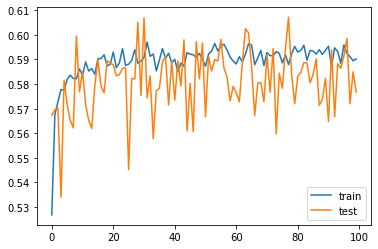

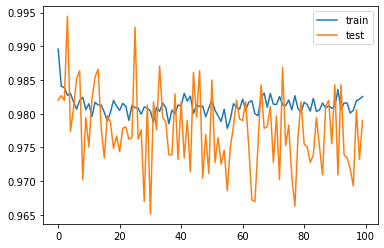

In [151]:
plt.plot(history.history['precision_2'], label = "train")
plt.plot(history.history['val_precision_2'], label = "test")
plt.legend()
plt.show()

plt.plot(history.history['recall_2'], label = "train")
plt.plot(history.history['val_recall_2'], label = "test")
plt.legend()
plt.show()

In [152]:
history2 = keras_model.fit(X_train_keras, y_train_keras, validation_data=(X_val, y_val), batch_size=64, epochs=100, class_weight={0: 1, 1: 8})

Epoch 1/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1383 - recall_2: 0.9812 - precision_2: 0.5908 - val_loss: 0.7447 - val_recall_2: 0.9647 - val_precision_2: 0.6061
Epoch 2/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1359 - recall_2: 0.9808 - precision_2: 0.5966 - val_loss: 0.7816 - val_recall_2: 0.9815 - val_precision_2: 0.5725
Epoch 3/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1342 - recall_2: 0.9825 - precision_2: 0.5895 - val_loss: 0.7499 - val_recall_2: 0.9765 - val_precision_2: 0.5825
Epoch 4/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1444 - recall_2: 0.9850 - precision_2: 0.5867 - val_loss: 0.7126 - val_recall_2: 0.9712 - val_precision_2: 0.5923
Epoch 5/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1367 - recall_2: 0.9831 - precision_2: 0.5896 - val_loss: 0.7406 - val_recall_2: 0.9707 - val_precision_2: 0.5985
Epoch 6/100
548/548 [========================

Epoch 44/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1248 - recall_2: 0.9826 - precision_2: 0.5981 - val_loss: 0.7860 - val_recall_2: 0.9774 - val_precision_2: 0.5813
Epoch 45/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1300 - recall_2: 0.9828 - precision_2: 0.5919 - val_loss: 0.7416 - val_recall_2: 0.9725 - val_precision_2: 0.5876
Epoch 46/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1262 - recall_2: 0.9844 - precision_2: 0.5934 - val_loss: 0.7693 - val_recall_2: 0.9714 - val_precision_2: 0.5949
Epoch 47/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1247 - recall_2: 0.9839 - precision_2: 0.5902 - val_loss: 0.7528 - val_recall_2: 0.9753 - val_precision_2: 0.5801
Epoch 48/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1438 - recall_2: 0.9844 - precision_2: 0.5867 - val_loss: 0.7516 - val_recall_2: 0.9742 - val_precision_2: 0.5849
Epoch 49/100
548/548 [==================

Epoch 87/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1263 - recall_2: 0.9838 - precision_2: 0.5914 - val_loss: 0.7861 - val_recall_2: 0.9836 - val_precision_2: 0.5675
Epoch 88/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1252 - recall_2: 0.9835 - precision_2: 0.5908 - val_loss: 0.8037 - val_recall_2: 0.9841 - val_precision_2: 0.5690
Epoch 89/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1202 - recall_2: 0.9828 - precision_2: 0.5943 - val_loss: 0.8058 - val_recall_2: 0.9838 - val_precision_2: 0.5611
Epoch 90/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1240 - recall_2: 0.9832 - precision_2: 0.5920 - val_loss: 0.7344 - val_recall_2: 0.9808 - val_precision_2: 0.5770
Epoch 91/100
548/548 [==============================] - 2s 3ms/step - loss: 1.1212 - recall_2: 0.9834 - precision_2: 0.5915 - val_loss: 0.7556 - val_recall_2: 0.9802 - val_precision_2: 0.5739
Epoch 92/100
548/548 [==================

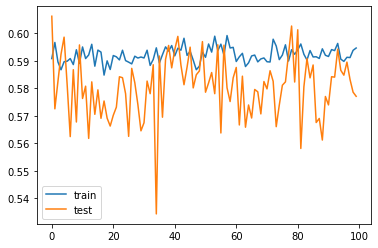

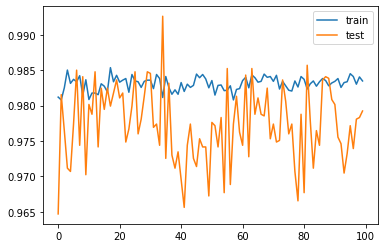

In [153]:
plt.plot(history2.history['precision_2'], label = "train")
plt.plot(history2.history['val_precision_2'], label = "test")
plt.legend()
plt.show()

plt.plot(history2.history['recall_2'], label = "train")
plt.plot(history2.history['val_recall_2'], label = "test")
plt.legend()
plt.show()

In [154]:
y_pred_keras = keras_model.predict(X_test)

## Porównanie modeli

In [155]:
from sklearn import metrics

models = []
models.append(('Logistic regression', lr.best_estimator_, y_pred_lr))
models.append(('SVM linear', svm_l.best_estimator_, y_pred_svm_l))
models.append(('SVM poly', svm_poly.best_estimator_, y_pred_svm_poly))
models.append(('SVM rbf', svm_rbf.best_estimator_, y_pred_svm_rbf))
models.append(('RandomForestClassifier', rf.best_estimator_, y_pred_rf))
models.append(('BaggingClassifier', svm_bg.best_estimator_, y_pred_svm_bg))
models.append(('AdaBoostClassifier', ada_boost.best_estimator_, y_pred_ada_boost))
models.append(('KNeighborsClassifier', knn.best_estimator_, y_pred_knn))
models.append(('MLPClassifier', mlp.best_estimator_, y_pred_mlp))
models.append(('Keras', keras_model, y_pred_keras))

precision = []
recall = []
f1 = []
accuracy = []
roc_auc = []
for name, model, pred in models:
    if name == 'Keras':
        pred = [round(x[0]) for x in model.predict(X_test)]
    precision.append(metrics.precision_score(y_test, pred))
    recall.append(metrics.recall_score(y_test, pred))
    f1.append( metrics.f1_score(y_test, pred))
    accuracy.append(metrics.accuracy_score(y_test, pred)) 
    roc_auc.append(metrics.roc_auc_score(y_test, pred))

In [156]:
d = {
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'accuracy' : accuracy,
    'roc_auc' : roc_auc
}
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Model', value=['Logistic regression', 'SVM linear', 'SVM poly', 'SVM rbf', 'RandomForestClassifier',
                                        'BaggingClassifier', 'AdaBoostClassifier','KNeighborsClassifier', 'MLPClassifier', 'Keras'])
df

,Model,precision,recall,f1,accuracy,roc_auc
0,Logistic regression,0.754181,0.788094,0.770765,0.764840,0.764763
1,SVM linear,0.737367,0.820863,0.776878,0.763470,0.763281
2,SVM poly,0.747783,0.798289,0.772211,0.763744,0.763630
3,SVM rbf,0.718602,0.827053,0.769022,0.750776,0.750525
4,RandomForestClassifier,0.743407,0.815948,0.777990,0.766393,0.766229
5,BaggingClassifier,0.746018,0.775897,0.760664,0.755068,0.755000
6,AdaBoostClassifier,0.631861,0.880211,0.735641,0.682648,0.681997
7,KNeighborsClassifier,0.748895,0.616785,0.676450,0.704018,0.704306
8,MLPClassifier,0.750085,0.805935,0.777007,0.767945,0.767820
9,Keras,0.584547,0.979246,0.732086,0.640457,0.639339


Sprawdźmy dodatkowo macierze błędów dla poszczególnych klasyfikatorów

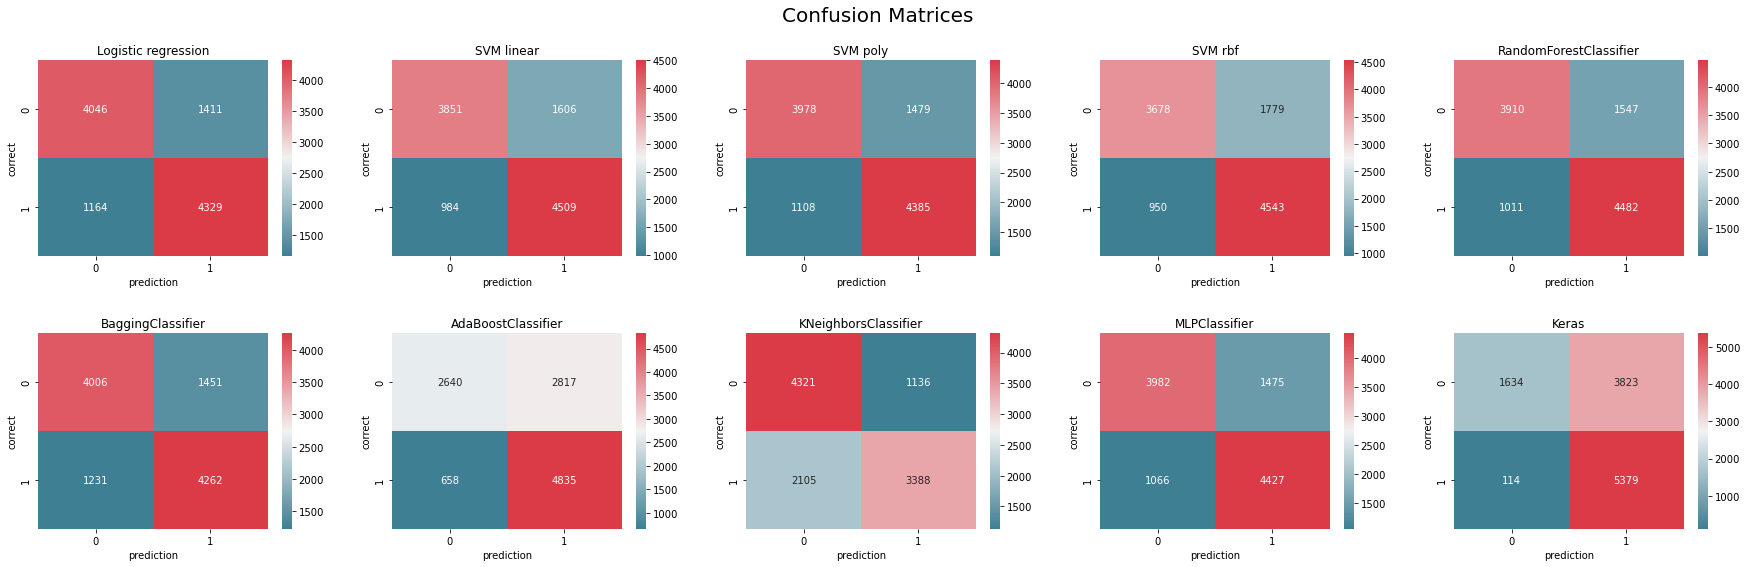

In [157]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(2, 5, figsize=(25,8))

for i, (name, model, pred) in enumerate(models):
  if name == 'Keras':
    pred = [round(x[0]) for x in pred]
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=True, cmap=cmap, fmt='.0f', ax=axs[i // 5, i % 5])
  axs[i // 5, i % 5].set_title(name)

for ax in axs.flat:
    ax.set(xlabel='prediction', ylabel='correct')
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle('Confusion Matrices', fontsize=20, verticalalignment='bottom')
fig.show()

Na podstawie tabeli oraz macierzy błędów można wywnioskować, że najlepszym klasyfikatorem okazał się być ***RandomForestClassifier***. Mimo tego jednak, większość klasyfikatorów jest w stanie dokonać poprawnie predykcji z trafnością około 75%